In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
import Perceptron as Custom_Perceptron

In [2]:
df = pd.read_csv('../data/dirty_data.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)*2-1
df = pd.DataFrame(x_scaled)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207154,-0.766866,-0.666667,-1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,-1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,1.0


In [6]:
df_features=df[list(range(8))]
df_target=df[8]

# Importing our own little perceptron

In [7]:
baby = Custom_Perceptron.Perceptron(n_epochs=1000,training_step=.1)

In [8]:
X_train = df_features.iloc[:300]
X_test = df_features.iloc[301:500]
X_val = df_features.iloc[501:]

y_train = df_target.iloc[:300]
y_test = df_target.iloc[301:500]
y_val = df_target.iloc[501:]




In [9]:
weights = baby.fit(X_train,y_train,X_val,y_val)
y_pred=baby.predict(X_test)
accuracy,loss,val_acc = baby.get_metrics()

100%|██████████| 1000/1000 [00:03<00:00, 326.03it/s]


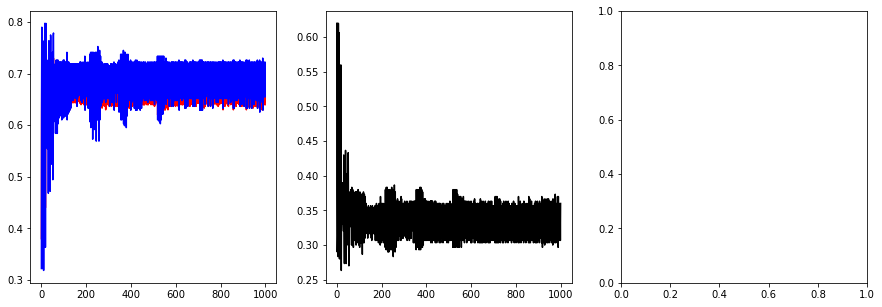

In [10]:
baby.plot_metrics()

In [18]:
baby.score(X_val,y_val)

0.6554307116104869

# Trying our perceptron with linearly separable data

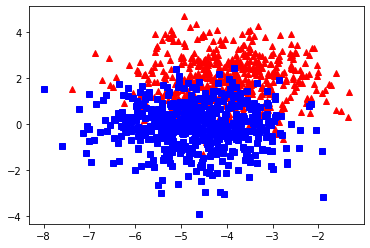

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split



X_2, y_2 = datasets.make_blobs(n_samples=1000, centers=2, n_features=2)
y_2 = -(y_2*2-1)

# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.33, random_state=42)

plt.plot(X_2[:, 0][y_2 == -1], X_2[:, 1][y_2 == -1], 'r^')
plt.plot(X_2[:, 0][y_2 == 1], X_2[:, 1][y_2 == 1], 'bs')
plt.show()

In [33]:
baby2 = Custom_Perceptron.Perceptron(n_epochs=600,training_step=.1)

In [34]:
weights_2=baby2.fit(pd.DataFrame(X_2),pd.Series(y_2))

100%|██████████| 600/600 [00:05<00:00, 115.67it/s]


In [35]:
baby2.score(X_2,y_2)

0.824

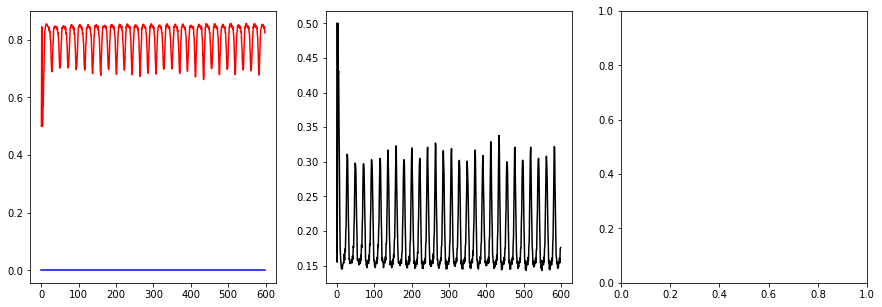

In [36]:
baby2.plot_metrics()

In [43]:
baby2.weights

array([ -95.29377483,  -96.69822007, -199.07929263])

# Trying other standard models

In [41]:
clf = Perceptron(tol=1, random_state=0)
clf.fit(X_2,y_2)
clf2 = Perceptron(tol=1, random_state=0)
clf2.fit(X_train,y_train)


Perceptron(tol=1)

In [42]:

clf.score(X_2,y_2)

0.773

In [46]:
clf.coef_

array([[ -1.82706668, -15.56207743]])

In [40]:

clf2.score(X_val,y_val)

0.3857677902621723